# 01. PyTorch Workflow Fundamentals

Resource notebook : https://www.learnpytorch.io/01_pytorch_workflow/

Lecture Video : https://www.youtube.com/watch?v=V_xro1bcAuA

Discussion Group : https://github.com/mrdbourke/pytorch-deep-learning/discussions


Created by : `KHIN THANDAR KYAW [30 Apr 2023]`

`Coral's Note` 
___
We have inputs. To get outputs, we have the particular weights and biases. This is for the target case.

For the case of prediction, the neural network will take care of it.
So, input which is not random but in specific values will be fed into the neural network. Weights and biases exist in the neural network and are randomly initialized. These randomized weights and biases along with definite input will produce the prediction (output) values. 

Then, the loss function (difference) of the target and the prediction values will be measured.

With this being said, we will know how many weights and biases should be increased or decreased by derivating the loss function in terms of weights and biases.

```
weight = weight - learning_rate * weight_gradient
```
```
bias = bias - learning_rate * bias_gradient
```

Then, increasing or decreasing these values will be conducted till the vlaues of predictions are equal to those of the target values.

![PyTorch Workflow](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

In [1]:
# PyTorch Workflow

# Let's explore an example PyTorch end-to-end workflow.

what_were_covering = {1: "data (prepare and load)",
                      2: "build model", 
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all togther"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all togther'}

### Torch NN 

https://pytorch.org/docs/stable/nn.html

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocs for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything. . . in machine leanring.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data. . . )
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representations.

![Machine Learning in two parts](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7 
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze : add a 1 dimension
y = weight * X + bias # regression formula

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

There are 3 datasets.
* Training Set (Course machine) : 60~80 %
* Validation Set (Practice exam) : 10~20%
* Test Set (Final exam) : 10~20 %


#### Generalization

The ability for a machine learning model to perform well on data it hasn't seen before.

#### Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visulize, visualize!"

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

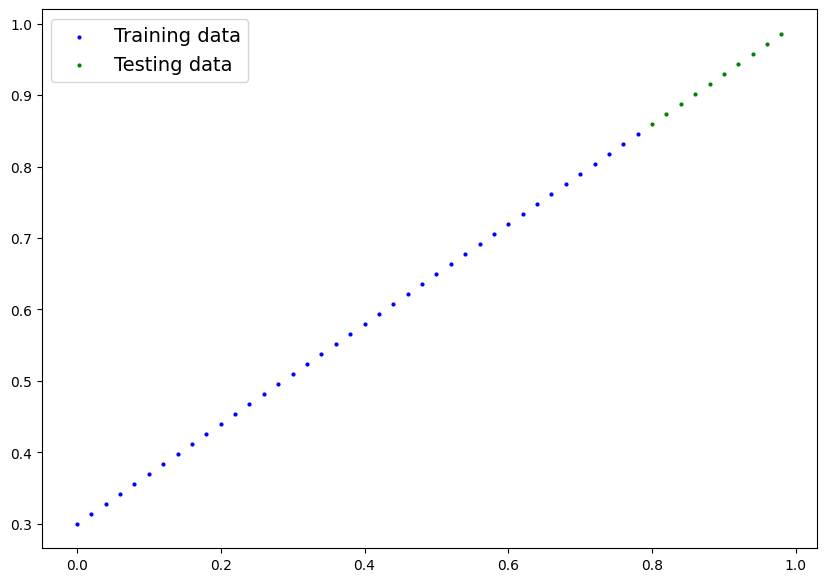

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch Model!

This is very exciting ... let's do it!

Because we're going to be building classes throughout the course, the orignial author `mrdbourke` recommends to refer https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
from torch import nn 

# Create linear regression model clas
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits nn.Module
  def __init__(self):
    super().__init__()

    # Initialize model paramters
    self.weights = nn.Parameter(torch.rand(1, # <- start with a random weight and try to adjust it to the ideal weight
                                           requires_grad=True, # <- can this parameter be updated via gradient descent?
                                           dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
    self.bias = nn.Parameter(torch.rand(1, # <- start with a random bias and try to adjust it to the ideal bias
                                        requires_grad=True, # <- can this parameter be updated via gradient descent?
                                        dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input tensor
    return self.weights * x + self.bias # this is the linear regression

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational grpahs (a neural network can be considered as a computational graph)
* torch.nn.Paramter - what parameters would our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subcalss it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

PyTorch cheatsheet : https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(30)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.9007], requires_grad=True),
 Parameter containing:
 tensor([0.7464], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.9007])), ('bias', tensor([0.7464]))])

In [11]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`


To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[1.4670],
        [1.4850],
        [1.5030],
        [1.5210],
        [1.5390],
        [1.5570],
        [1.5750],
        [1.5931],
        [1.6111],
        [1.6291]], grad_fn=<AddBackward0>)

In [14]:
# Make predictions with model
%%time
with torch.inference_mode(): # turn_off the gradient tracking (in larger dataset, it is much faster)
  y_preds = model_0(X_test)

y_preds

CPU times: user 0 ns, sys: 728 µs, total: 728 µs
Wall time: 600 µs


tensor([[1.4670],
        [1.4850],
        [1.5030],
        [1.5210],
        [1.5390],
        [1.5570],
        [1.5750],
        [1.5931],
        [1.6111],
        [1.6291]])

In [15]:
# You can also do something similar with torch.no_grad(), however, inference_node() is prefered
%%time
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

CPU times: user 845 µs, sys: 162 µs, total: 1.01 ms
Wall time: 2.28 ms


tensor([[1.4670],
        [1.4850],
        [1.5030],
        [1.5210],
        [1.5390],
        [1.5570],
        [1.5750],
        [1.5931],
        [1.6111],
        [1.6291]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

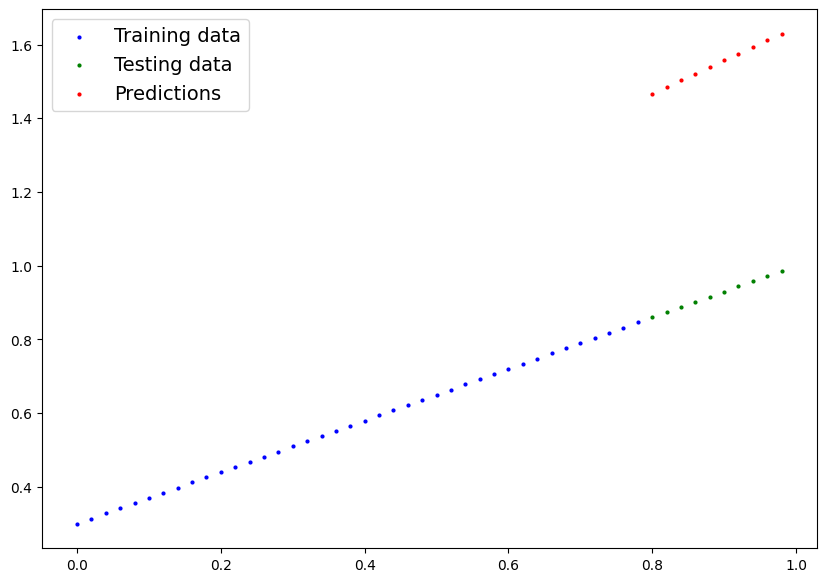

In [17]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unkown* parameters (these may be random) to some *known* parameters.

Or in other words, from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

  * Inside the optimizer, you'll often have to set two parameters.
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimzer changes the paramters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9007], requires_grad=True),
 Parameter containing:
 tensor([0.7464], requires_grad=True)]

In [19]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.9007])), ('bias', tensor([0.7464]))])

![L1Loss](https://camo.githubusercontent.com/07dc8223af5524a8f4ad16c51ffb1f9953cb1783ee796d5120108ee291348e08/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f7079746f7263682d646565702d6c6561726e696e672f6d61696e2f696d616765732f30312d6d61652d6c6f73732d616e6e6f74617465642e706e67)

In [20]:
# Setup a loss function : measure how wrong our model is
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent) : adjust parameters of our model to get the smallest loss 
# the smaller the learing rate, the smaller the change in parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning_rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` to make predictions on data- also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [21]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.9007], requires_grad=True),
 Parameter containing:
 tensor([0.7464], requires_grad=True)]

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9007], requires_grad=True),
 Parameter containing:
 tensor([0.7464], requires_grad=True)]

In [23]:
with torch.no_grad():
  list(model_0.parameters())

In [24]:
# An epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
# so we can compare our current expereince to the previous one
epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requrire gradients to require gradients

  # 1. Forward pass
  # pass the data through the model
  # this will perform the `forward()` method located within the model object
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  # how wrong the model's predictions are
  loss = loss_fn(y_pred, y_train) # loss(input,target)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  # Zero the gradients of the optimizer (they accumulate by default)
  # zero them to start fresh each forward pass
  optimizer.zero_grad() # set zero after one epoch

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  # with `requires_grad=True`
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  # update the model's parameters w.r.t the gradients calculated by loss.backward()
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  # in testing, we have to turn of gradient descent
  # bc we just want to evaluate the model already trained
  # we do not want to train the model using our test train
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batchnorm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scene
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    #2 . Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0: 
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.5246530771255493 | Test loss: 0.611553966999054
OrderedDict([('weights', tensor([0.8968])), ('bias', tensor([0.7364]))])
Epoch: 10 | Loss: 0.4094432294368744 | Test loss: 0.4768441319465637
OrderedDict([('weights', tensor([0.8578])), ('bias', tensor([0.6364]))])
Epoch: 20 | Loss: 0.2942332923412323 | Test loss: 0.3421342968940735
OrderedDict([('weights', tensor([0.8188])), ('bias', tensor([0.5364]))])
Epoch: 30 | Loss: 0.17902342975139618 | Test loss: 0.20742449164390564
OrderedDict([('weights', tensor([0.7798])), ('bias', tensor([0.4364]))])
Epoch: 40 | Loss: 0.06381357461214066 | Test loss: 0.07271464914083481
OrderedDict([('weights', tensor([0.7408])), ('bias', tensor([0.3364]))])
Epoch: 50 | Loss: 0.003018368734046817 | Test loss: 0.00616843719035387
OrderedDict([('weights', tensor([0.7133])), ('bias', tensor([0.2944]))])
Epoch: 60 | Loss: 0.00915967021137476 | Test loss: 0.0005557596450671554
OrderedDict([('weights', tensor([0.7058])), ('bias', tensor([0.2954]))

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` wil sufficce.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

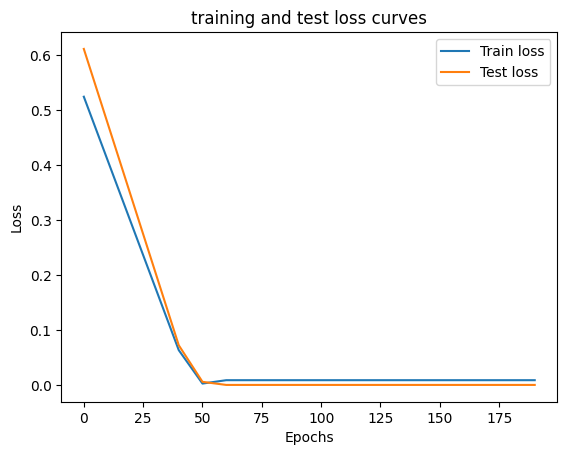

In [25]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [26]:
model_0.state_dict() # prediction

OrderedDict([('weights', tensor([0.7097])), ('bias', tensor([0.3054]))])

In [27]:
weight, bias # target

(0.7, 0.3)

In [28]:
# Make some predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

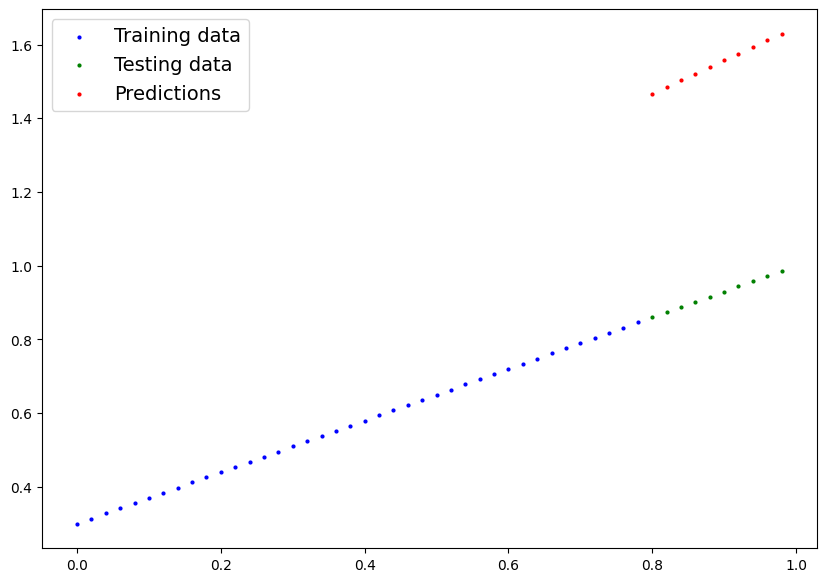

In [29]:
plot_predictions(predictions=y_preds)

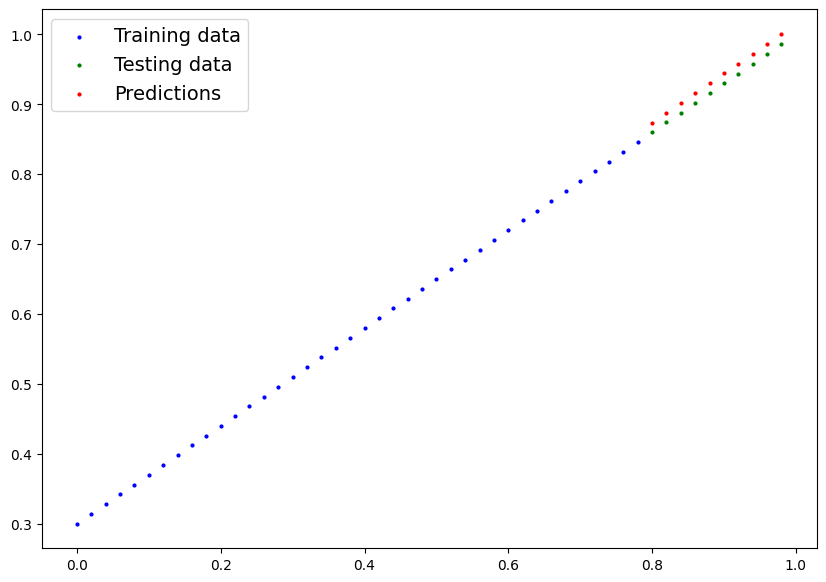

In [30]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()`

In [31]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model svae path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" #.pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


In [32]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 May  1 11:05 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7097])), ('bias', tensor([0.3054]))])

In [34]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [35]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7097])), ('bias', tensor([0.3054]))])

In [36]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8732],
        [0.8873],
        [0.9015],
        [0.9157],
        [0.9299],
        [0.9441],
        [0.9583],
        [0.9725],
        [0.9867],
        [1.0009]])

In [37]:
# Make some models preds
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

In [38]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [39]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'

Create device-agnostic code.

This means if we've got access to GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [40]:
# Setup device agnostic code
# cuda is NVIDIA's programming framework for their gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [41]:
!nvidia-smi

Mon May  1 11:05:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data


In [42]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim= 1) # add 1 dimension, dim = 1 means 'add 1 at column', without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [43]:
# Split data
# take 80 % of data as training
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

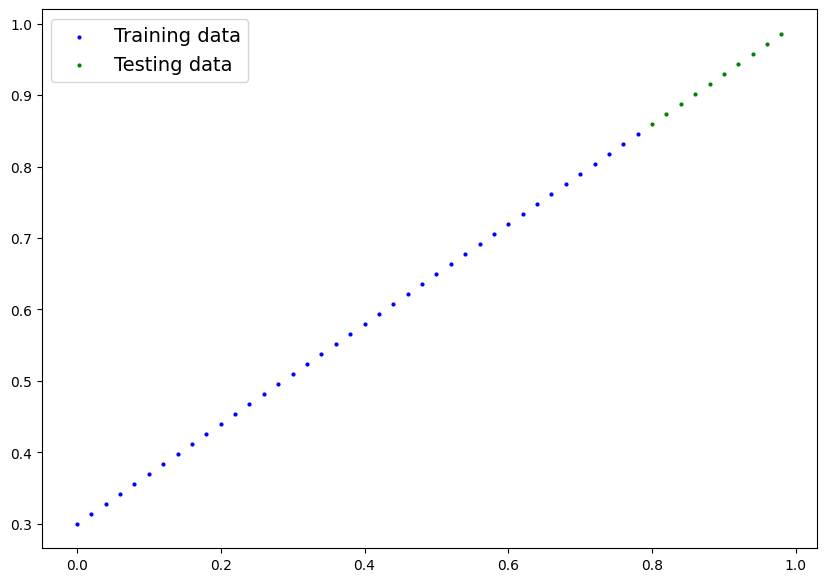

In [44]:
# Plot the data
# Note : if you don't have the plot_predictions() function loaded, this will run error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model

In [45]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # you do not need to initialize weights and biases randomlly
    # you just need to create a layer in which weights and biases are automatically initialized
    # all you need to do is to know which model shall be used for the particular input
    # Use nn.Linear() for creating the model parameters 
    # nn.Linear uses y = x * Tranpose(A) + b
    # also called : linear layer, linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, # input size 1 :  X_train or X_test
                                  out_features=1) # output size 1 : y_train or y_test

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
# Check model and its parameters
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [46]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [47]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [48]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [49]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perfrom backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing 
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss : {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss : 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss : 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss : 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss : 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss : 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss : 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss : 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss : 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss : 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss : 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss : 0.0

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [51]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [52]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

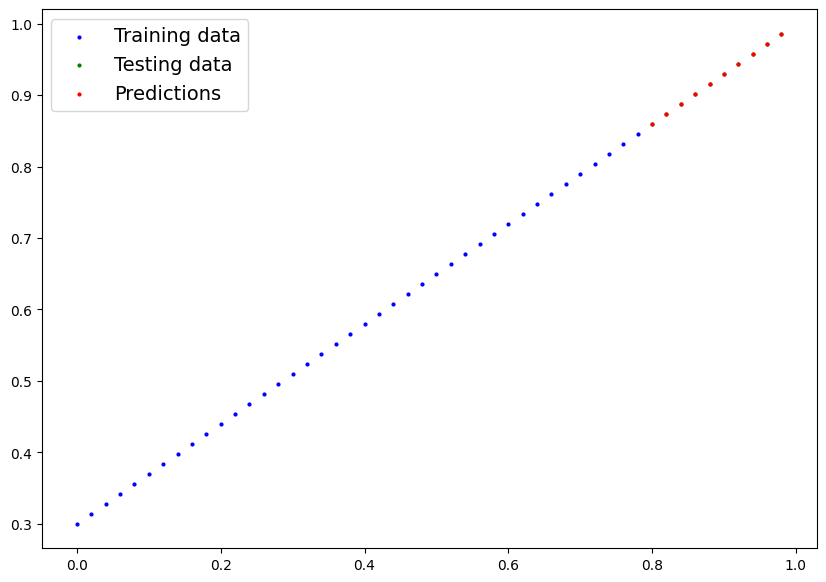

In [55]:
# Chek out our model predictions visually
plot_predictions(predictions=y_preds.cpu()) # matplotlib is on cpu as it is based on numpy

### 6.5 Saving & loading a trained model 

In [60]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model stat dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_1.pth


In [61]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [62]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [65]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [66]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [67]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curriculum

https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum